In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from  matplotlib.patches import Polygon
from IPython.display import Image
import imageio.v2
import csv

import tqdm as tqdm
import jax 
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_debug_nans", False)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from iLQR import iLQR, Path



In [4]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

In [22]:
jax.config.update('jax_platform_name', 'cpu')

centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)
config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR()#config_file)
# # make some obstacles
# obs1 = np.array([[-1, -1, -0, -0], [5.2, 6.0, 6.0, 5.2]]).T
obs1 = np.array([[-1, -1, -0.5, -0.5], [5.2, 5.9, 5.9, 5.2]]).T
obs2 = np.array([[1, 1, 1.5, 1.5], [-0.2, 0.5, 0.5, -0.2]]).T
obs_list = [[obs1 for _ in range(10)]]#, [obs2 for _ in range(10)]]
solver.update_obstacles(obs_list)
solver.update_path(path)

Fail attempts 1, new reg 0.19999998807907104.
Fail attempts 2, new reg 0.9999999403953552.
Fail attempts 3, new reg 4.999999523162842.
Fail attempts 4, new reg 24.999998092651367.
Fail attempts 5, new reg 124.99999237060547.
Fail attempts 6, new reg 624.9999389648438.
Fail attempts 7, new reg 3124.999755859375.
Fail attempts 8, new reg 15624.9990234375.
Fail attempts 9, new reg 78124.9921875.
Fail attempts 10, new reg 390624.96875.


1
0.04621386528015137


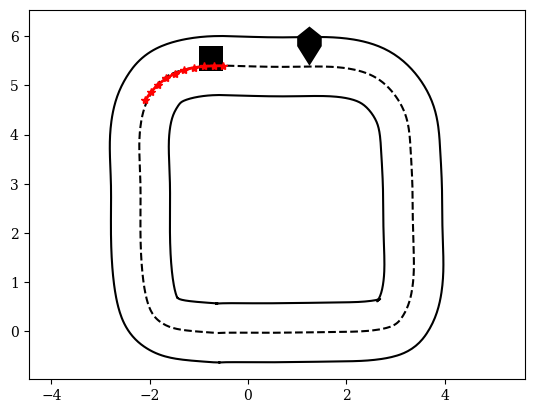

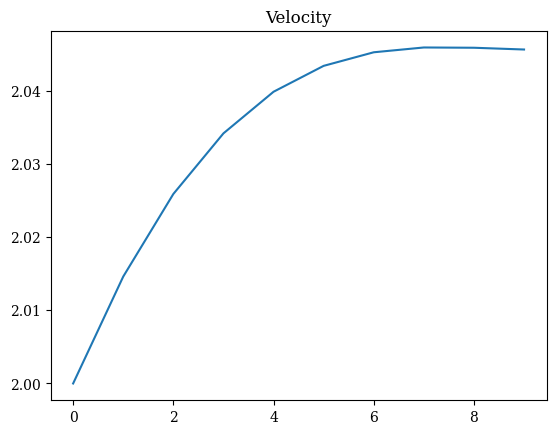

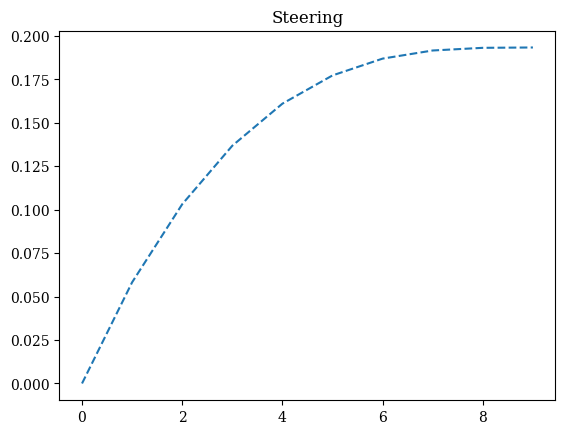

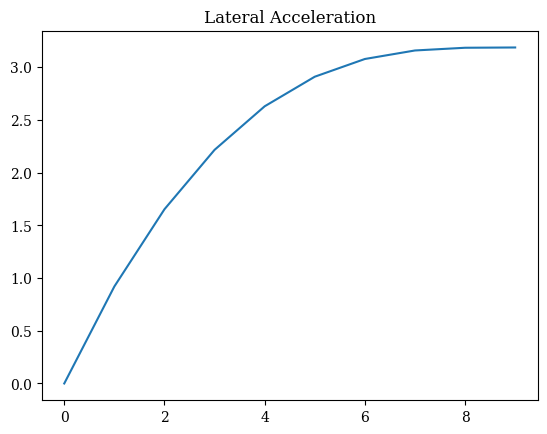

In [8]:
# solver.update_obstacles(obs_list)

x_cur = np.array([-0.5, 5.4, 2, 3.14, 0])
plan = solver.plan(x_cur)

path.plot_track()
path.plot_track_center()
plt.plot(plan['states'][0, :], plan['states'][1, :], 'r-*', linewidth=2)

p = Polygon(obs1, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

p = Polygon(obs2, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

print(plan['status'])

plt.figure()
a = plan['states'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['states'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['states'][2, :]**2 / 0.257 * np.tan(plan['states'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')

print(plan['t_process'])


iLQR setting: iLQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'n': 10, 'dt': 0.1, 'verbose': True, 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': 1e-05, 'reg_max': 100000000.0, 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 1.0, 'path_huber_delta': 2, 'dim_vel_ref': 3, 'vel_cost_type': 'quadratic', 'vel_weight': 2.0, 'vel_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2.0, 'dim_progress': 4, 'progress_weight': 1.0, 'dim_right_boundary': 5, 'dim_left_boundary': 6, 'lane_boundary_a': 100.0, 'lane_boundary_b': 1.0, 'ctrl_cost_type': 'quadratic', 'ctrl

iLQR takes : 0.07 sec']:   0%|          | 0/100 [00:00<?, ?it/s]

Update from  -1.7941883  to  -1.7976445 reg:  1.0 alpha: 0.100 0.067
Exit after 0 iterations with runtime 0.06885552406311035 with status Converged. Set uo takes 0.0471339225769043 s. Total 1 cost derivative with average time of 0.0025360584259033203 s. Total 1 dyn derivative with average time of 0.00025200843811035156 s. Total 3 forward with average time of 0.004929939905802409 s. Total 1 cost derivative with average time of 0.0010380744934082031 s.


iLQR takes : 0.02 sec']:   1%|          | 1/100 [00:00<01:16,  1.30it/s]

Update from  -1.798062  to  -1.7994727 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.024651050567626953 with status Converged. Set uo takes 0.0062177181243896484 s. Total 1 cost derivative with average time of 0.0013337135314941406 s. Total 1 dyn derivative with average time of 0.00012922286987304688 s. Total 3 forward with average time of 0.004662990570068359 s. Total 1 cost derivative with average time of 0.0006520748138427734 s.


iLQR takes : 0.02 sec']:   2%|▏         | 2/100 [00:01<01:14,  1.31it/s]

Update from  -1.7994437  to  -1.7996145 reg:  1.0 alpha: 0.100 0.022
Exit after 0 iterations with runtime 0.022951126098632812 with status Converged. Set uo takes 0.005606174468994141 s. Total 1 cost derivative with average time of 0.0013687610626220703 s. Total 1 dyn derivative with average time of 0.00012063980102539062 s. Total 3 forward with average time of 0.004380861918131511 s. Total 1 cost derivative with average time of 0.0004706382751464844 s.


iLQR takes : 0.02 sec']:   3%|▎         | 3/100 [00:02<01:13,  1.32it/s]

cost increase from -1.7994449138641357 to -1.7988743782043457, but the difference is 0.0005705356597900391 is small.
Exit after 0 iterations with runtime 0.02216315269470215 with status Converged. Set uo takes 0.0058596134185791016 s. Total 1 cost derivative with average time of 0.0008311271667480469 s. Total 1 dyn derivative with average time of 0.00011324882507324219 s. Total 3 forward with average time of 0.004478057225545247 s. Total 1 cost derivative with average time of 0.0003902912139892578 s.


iLQR takes : 0.03 sec']:   4%|▍         | 4/100 [00:03<01:23,  1.15it/s]

Update from  -1.7972358  to  -1.7979711 reg:  1.0 alpha: 0.100 0.026
Exit after 0 iterations with runtime 0.028348684310913086 with status Converged. Set uo takes 0.008095264434814453 s. Total 1 cost derivative with average time of 0.001065969467163086 s. Total 1 dyn derivative with average time of 0.0001442432403564453 s. Total 3 forward with average time of 0.005232016245524089 s. Total 1 cost derivative with average time of 0.0003750324249267578 s.


iLQR takes : 0.02 sec']:   5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Update from  -1.7871296  to  -1.7897047 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.024445056915283203 with status Converged. Set uo takes 0.0075109004974365234 s. Total 1 cost derivative with average time of 0.0007634162902832031 s. Total 1 dyn derivative with average time of 0.00015211105346679688 s. Total 3 forward with average time of 0.00460966428120931 s. Total 1 cost derivative with average time of 0.0003345012664794922 s.


iLQR takes : 0.09 sec']:   6%|▌         | 6/100 [00:04<01:14,  1.26it/s]

Update from  -1.745028  to  -1.7556874 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7556874  to  -1.767491 reg:  0.2 alpha: 0.100 0.038
Update from  -1.767491  to  -1.7761686 reg:  0.04 alpha: 0.100 0.056
Update from  -1.7761686  to  -1.7816128 reg:  0.007999999 alpha: 0.100 0.072
Update from  -1.7816128  to  -1.7843528 reg:  0.0015999998 alpha: 0.100 0.088
Exit after 4 iterations with runtime 0.08906722068786621 with status Converged. Set uo takes 0.006293773651123047 s. Total 5 cost derivative with average time of 0.0007402896881103516 s. Total 5 dyn derivative with average time of 0.00012240409851074218 s. Total 15 forward with average time of 0.004548978805541992 s. Total 5 cost derivative with average time of 0.0003672122955322266 s.


iLQR takes : 0.02 sec']:   7%|▋         | 7/100 [00:05<01:14,  1.25it/s]

Update from  -1.7206795  to  -1.7337623 reg:  1.0 alpha: 1.000 0.018
Exit after 0 iterations with runtime 0.01971435546875 with status Converged. Set uo takes 0.006670951843261719 s. Total 1 cost derivative with average time of 0.000835418701171875 s. Total 1 dyn derivative with average time of 0.00011420249938964844 s. Total 2 forward with average time of 0.004787087440490723 s. Total 1 cost derivative with average time of 0.00038623809814453125 s.


iLQR takes : 0.02 sec']:   8%|▊         | 8/100 [00:06<01:11,  1.29it/s]

Update from  -1.7084432  to  -1.7091079 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.023908138275146484 with status Converged. Set uo takes 0.007082700729370117 s. Total 1 cost derivative with average time of 0.0007815361022949219 s. Total 1 dyn derivative with average time of 0.0001266002655029297 s. Total 3 forward with average time of 0.004613240559895833 s. Total 1 cost derivative with average time of 0.0004277229309082031 s.


iLQR takes : 0.07 sec']:   9%|▉         | 9/100 [00:07<01:08,  1.32it/s]

Update from  -1.6662138  to  -1.6786408 reg:  1.0 alpha: 0.100 0.022
Update from  -1.6786408  to  -1.6990323 reg:  0.2 alpha: 0.100 0.040
Update from  -1.6990323  to  -1.7106972 reg:  0.04 alpha: 0.100 0.056
Update from  -1.7106972  to  -1.7130662 reg:  0.007999999 alpha: 0.100 0.071
Exit after 3 iterations with runtime 0.07181692123413086 with status Converged. Set uo takes 0.006169319152832031 s. Total 4 cost derivative with average time of 0.0006445646286010742 s. Total 4 dyn derivative with average time of 0.00014078617095947266 s. Total 12 forward with average time of 0.0045348405838012695 s. Total 4 cost derivative with average time of 0.000317990779876709 s.


iLQR takes : 0.03 sec']:  10%|█         | 10/100 [00:07<01:08,  1.32it/s]

Update from  -1.7093351  to  -1.7093724 reg:  1.0 alpha: 0.010 0.027
Exit after 0 iterations with runtime 0.028139114379882812 with status Converged. Set uo takes 0.006283760070800781 s. Total 1 cost derivative with average time of 0.0006422996520996094 s. Total 1 dyn derivative with average time of 0.00010967254638671875 s. Total 4 forward with average time of 0.004506528377532959 s. Total 1 cost derivative with average time of 0.00042366981506347656 s.


iLQR takes : 0.06 sec']:  11%|█         | 11/100 [00:08<01:16,  1.17it/s]

Update from  -1.679251  to  -1.6944538 reg:  1.0 alpha: 0.100 0.026
Update from  -1.6944538  to  -1.7031926 reg:  0.2 alpha: 0.100 0.044
cost increase from -1.7031925916671753 to -1.7026677131652832, but the difference is 0.0005248785018920898 is small.
Exit after 2 iterations with runtime 0.062438249588012695 with status Converged. Set uo takes 0.008050680160522461 s. Total 3 cost derivative with average time of 0.0008744398752848307 s. Total 3 dyn derivative with average time of 0.00015807151794433594 s. Total 9 forward with average time of 0.004948801464504666 s. Total 3 cost derivative with average time of 0.0003669261932373047 s.


iLQR takes : 0.06 sec']:  12%|█▏        | 12/100 [00:09<01:13,  1.20it/s]

Update from  -1.6789299  to  -1.6945846 reg:  1.0 alpha: 0.100 0.024
Update from  -1.6945846  to  -1.7019819 reg:  0.2 alpha: 0.100 0.043
Update from  -1.7019819  to  -1.7021779 reg:  0.04 alpha: 0.010 0.064
Exit after 2 iterations with runtime 0.06492972373962402 with status Converged. Set uo takes 0.0066835880279541016 s. Total 3 cost derivative with average time of 0.0006935596466064453 s. Total 3 dyn derivative with average time of 0.0001212755839029948 s. Total 10 forward with average time of 0.004859447479248047 s. Total 3 cost derivative with average time of 0.0004134972890218099 s.


iLQR takes : 0.06 sec']:  13%|█▎        | 13/100 [00:10<01:10,  1.23it/s]

Update from  -1.6944215  to  -1.7078738 reg:  1.0 alpha: 0.100 0.024
Update from  -1.7078738  to  -1.713196 reg:  0.2 alpha: 0.100 0.041
Update from  -1.713196  to  -1.7135719 reg:  0.04 alpha: 0.010 0.061
Exit after 2 iterations with runtime 0.06133699417114258 with status Converged. Set uo takes 0.007092714309692383 s. Total 3 cost derivative with average time of 0.0006474653879801432 s. Total 3 dyn derivative with average time of 0.0001366138458251953 s. Total 10 forward with average time of 0.004539012908935547 s. Total 3 cost derivative with average time of 0.0003323554992675781 s.


iLQR takes : 0.04 sec']:  14%|█▍        | 14/100 [00:11<01:09,  1.24it/s]

Update from  -1.7110561  to  -1.7218809 reg:  1.0 alpha: 0.100 0.026
Update from  -1.7218809  to  -1.7261871 reg:  0.2 alpha: 0.100 0.044
Exit after 1 iterations with runtime 0.044858455657958984 with status Converged. Set uo takes 0.006096601486206055 s. Total 2 cost derivative with average time of 0.0006704330444335938 s. Total 2 dyn derivative with average time of 0.00012052059173583984 s. Total 6 forward with average time of 0.005389730135599772 s. Total 2 cost derivative with average time of 0.0002906322479248047 s.


iLQR takes : 0.04 sec']:  15%|█▌        | 15/100 [00:12<01:06,  1.27it/s]

Update from  -1.585732  to  -1.5940408 reg:  1.0 alpha: 0.100 0.023
Update from  -1.5940408  to  -1.5971729 reg:  0.2 alpha: 0.100 0.042
Exit after 1 iterations with runtime 0.04265594482421875 with status Converged. Set uo takes 0.006111621856689453 s. Total 2 cost derivative with average time of 0.0006897449493408203 s. Total 2 dyn derivative with average time of 0.0001195669174194336 s. Total 6 forward with average time of 0.005020737648010254 s. Total 2 cost derivative with average time of 0.0002980232238769531 s.


iLQR takes : 0.04 sec']:  16%|█▌        | 16/100 [00:12<01:05,  1.29it/s]

Update from  -1.6207203  to  -1.6266066 reg:  1.0 alpha: 0.100 0.024
Update from  -1.6266066  to  -1.6288955 reg:  0.2 alpha: 0.100 0.042
Exit after 1 iterations with runtime 0.04291892051696777 with status Converged. Set uo takes 0.006618499755859375 s. Total 2 cost derivative with average time of 0.0007370710372924805 s. Total 2 dyn derivative with average time of 0.00012505054473876953 s. Total 6 forward with average time of 0.004983941713968913 s. Total 2 cost derivative with average time of 0.00031626224517822266 s.


iLQR takes : 0.03 sec']:  17%|█▋        | 17/100 [00:13<01:03,  1.30it/s]

Update from  -1.6628767  to  -1.6669854 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.025870800018310547 with status Converged. Set uo takes 0.006541252136230469 s. Total 1 cost derivative with average time of 0.0006086826324462891 s. Total 1 dyn derivative with average time of 0.0001308917999267578 s. Total 3 forward with average time of 0.005210320154825847 s. Total 1 cost derivative with average time of 0.0003542900085449219 s.


iLQR takes : 0.04 sec']:  18%|█▊        | 18/100 [00:14<01:09,  1.18it/s]

Update from  -1.694358  to  -1.7007115 reg:  1.0 alpha: 0.100 0.024
Update from  -1.7007115  to  -1.704074 reg:  0.2 alpha: 0.100 0.041
Exit after 1 iterations with runtime 0.042083024978637695 with status Converged. Set uo takes 0.006017923355102539 s. Total 2 cost derivative with average time of 0.0006656646728515625 s. Total 2 dyn derivative with average time of 0.00014209747314453125 s. Total 6 forward with average time of 0.0049094756444295245 s. Total 2 cost derivative with average time of 0.0003910064697265625 s.


iLQR takes : 0.03 sec']:  19%|█▉        | 19/100 [00:15<01:06,  1.23it/s]

Update from  -1.720917  to  -1.7253902 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.025076627731323242 with status Converged. Set uo takes 0.007295370101928711 s. Total 1 cost derivative with average time of 0.0005664825439453125 s. Total 1 dyn derivative with average time of 0.00010275840759277344 s. Total 3 forward with average time of 0.004948933919270833 s. Total 1 cost derivative with average time of 0.00037169456481933594 s.


iLQR takes : 0.04 sec']:  20%|██        | 20/100 [00:16<01:03,  1.26it/s]

Update from  -1.7338426  to  -1.7399486 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7399486  to  -1.7436609 reg:  0.2 alpha: 0.100 0.040
Exit after 1 iterations with runtime 0.04089975357055664 with status Converged. Set uo takes 0.00634455680847168 s. Total 2 cost derivative with average time of 0.0009762048721313477 s. Total 2 dyn derivative with average time of 0.00013053417205810547 s. Total 6 forward with average time of 0.0047215620676676435 s. Total 2 cost derivative with average time of 0.0003921985626220703 s.


iLQR takes : 0.03 sec']:  21%|██        | 21/100 [00:16<01:01,  1.29it/s]

Update from  -1.7474825  to  -1.7516192 reg:  1.0 alpha: 0.100 0.027
Exit after 0 iterations with runtime 0.027424097061157227 with status Converged. Set uo takes 0.007599830627441406 s. Total 1 cost derivative with average time of 0.0006537437438964844 s. Total 1 dyn derivative with average time of 0.000118255615234375 s. Total 3 forward with average time of 0.005574146906534831 s. Total 1 cost derivative with average time of 0.00038504600524902344 s.


iLQR takes : 0.04 sec']:  22%|██▏       | 22/100 [00:17<00:59,  1.30it/s]

Update from  -1.750547  to  -1.7558855 reg:  1.0 alpha: 0.100 0.024
Update from  -1.7558855  to  -1.7591223 reg:  0.2 alpha: 0.100 0.042
Exit after 1 iterations with runtime 0.04269886016845703 with status Converged. Set uo takes 0.0054149627685546875 s. Total 2 cost derivative with average time of 0.0013774633407592773 s. Total 2 dyn derivative with average time of 0.00015819072723388672 s. Total 6 forward with average time of 0.004947344462076823 s. Total 2 cost derivative with average time of 0.0003399848937988281 s.


iLQR takes : 0.03 sec']:  23%|██▎       | 23/100 [00:18<00:58,  1.31it/s]

Update from  -1.7544987  to  -1.7579889 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.025398969650268555 with status Converged. Set uo takes 0.005980968475341797 s. Total 1 cost derivative with average time of 0.000774383544921875 s. Total 1 dyn derivative with average time of 0.0001461505889892578 s. Total 3 forward with average time of 0.005165259043375651 s. Total 1 cost derivative with average time of 0.0003304481506347656 s.


iLQR takes : 0.05 sec']:  24%|██▍       | 24/100 [00:18<00:56,  1.34it/s]

Update from  -1.7449555  to  -1.7513156 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7513156  to  -1.7556498 reg:  0.2 alpha: 0.100 0.046
Exit after 1 iterations with runtime 0.046337127685546875 with status Converged. Set uo takes 0.006792306900024414 s. Total 2 cost derivative with average time of 0.0007721185684204102 s. Total 2 dyn derivative with average time of 0.00014495849609375 s. Total 6 forward with average time of 0.0053397417068481445 s. Total 2 cost derivative with average time of 0.0004372596740722656 s.


iLQR takes : 0.06 sec']:  25%|██▌       | 25/100 [00:19<00:56,  1.33it/s]

Update from  -1.733391  to  -1.7412373 reg:  1.0 alpha: 0.100 0.026
Update from  -1.7412373  to  -1.7470882 reg:  0.2 alpha: 0.100 0.045
Update from  -1.7470882  to  -1.7508316 reg:  0.04 alpha: 0.100 0.062
Exit after 2 iterations with runtime 0.06279397010803223 with status Converged. Set uo takes 0.0072422027587890625 s. Total 3 cost derivative with average time of 0.0006037553151448568 s. Total 3 dyn derivative with average time of 0.00013669331868489584 s. Total 9 forward with average time of 0.005120462841457791 s. Total 3 cost derivative with average time of 0.0003467400868733724 s.


iLQR takes : 0.05 sec']:  26%|██▌       | 26/100 [00:20<01:02,  1.19it/s]

Update from  -1.7234073  to  -1.7318792 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7318792  to  -1.739257 reg:  0.2 alpha: 0.100 0.038
Update from  -1.739257  to  -1.7439818 reg:  0.04 alpha: 0.100 0.054
Exit after 2 iterations with runtime 0.05420708656311035 with status Converged. Set uo takes 0.006445169448852539 s. Total 3 cost derivative with average time of 0.0005617141723632812 s. Total 3 dyn derivative with average time of 0.00012000401814778645 s. Total 9 forward with average time of 0.004518455929226345 s. Total 3 cost derivative with average time of 0.0002873738606770833 s.


iLQR takes : 0.07 sec']:  27%|██▋       | 27/100 [00:21<00:59,  1.22it/s]

Update from  -1.714955  to  -1.7253549 reg:  1.0 alpha: 0.100 0.023
Update from  -1.7253549  to  -1.7354244 reg:  0.2 alpha: 0.100 0.042
Update from  -1.7354244  to  -1.7416977 reg:  0.04 alpha: 0.100 0.058
Update from  -1.7416977  to  -1.7448953 reg:  0.007999999 alpha: 0.100 0.074
Exit after 3 iterations with runtime 0.07473325729370117 with status Converged. Set uo takes 0.006661891937255859 s. Total 4 cost derivative with average time of 0.0006757974624633789 s. Total 4 dyn derivative with average time of 0.00013190507888793945 s. Total 12 forward with average time of 0.004825770854949951 s. Total 4 cost derivative with average time of 0.00030368566513061523 s.


iLQR takes : 0.06 sec']:  28%|██▊       | 28/100 [00:22<00:59,  1.21it/s]

Update from  -1.7263519  to  -1.7340397 reg:  1.0 alpha: 0.100 0.023
Update from  -1.7340397  to  -1.7409009 reg:  0.2 alpha: 0.100 0.041
Update from  -1.7409009  to  -1.7447169 reg:  0.04 alpha: 0.100 0.059
Exit after 2 iterations with runtime 0.059194087982177734 with status Converged. Set uo takes 0.006621599197387695 s. Total 3 cost derivative with average time of 0.00048287709554036457 s. Total 3 dyn derivative with average time of 0.0001098314921061198 s. Total 9 forward with average time of 0.00493666860792372 s. Total 3 cost derivative with average time of 0.00032130877176920575 s.


iLQR takes : 0.06 sec']:  29%|██▉       | 29/100 [00:23<00:57,  1.24it/s]

Update from  -1.7267388  to  -1.7349532 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7349532  to  -1.742705 reg:  0.2 alpha: 0.100 0.043
Update from  -1.742705  to  -1.7469255 reg:  0.04 alpha: 0.100 0.062
Exit after 2 iterations with runtime 0.06239485740661621 with status Converged. Set uo takes 0.007085084915161133 s. Total 3 cost derivative with average time of 0.0005598862965901693 s. Total 3 dyn derivative with average time of 0.00015282630920410156 s. Total 9 forward with average time of 0.0051742129855685765 s. Total 3 cost derivative with average time of 0.0003292560577392578 s.


iLQR takes : 0.06 sec']:  30%|███       | 30/100 [00:23<00:55,  1.26it/s]

Update from  -1.725232  to  -1.7348242 reg:  1.0 alpha: 0.100 0.023
Update from  -1.7348242  to  -1.7434493 reg:  0.2 alpha: 0.100 0.041
Update from  -1.7434493  to  -1.7482222 reg:  0.04 alpha: 0.100 0.058
Exit after 2 iterations with runtime 0.058356523513793945 with status Converged. Set uo takes 0.006099224090576172 s. Total 3 cost derivative with average time of 0.0005624294281005859 s. Total 3 dyn derivative with average time of 0.00013589859008789062 s. Total 9 forward with average time of 0.0048851701948377825 s. Total 3 cost derivative with average time of 0.00032409032185872394 s.


iLQR takes : 0.08 sec']:  31%|███       | 31/100 [00:24<00:54,  1.27it/s]

Update from  -1.7228827  to  -1.7338008 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7338008  to  -1.7438228 reg:  0.2 alpha: 0.100 0.045
Update from  -1.7438228  to  -1.7492409 reg:  0.04 alpha: 0.100 0.062
Update from  -1.7492409  to  -1.7499826 reg:  0.007999999 alpha: 0.100 0.081
Exit after 3 iterations with runtime 0.08131694793701172 with status Converged. Set uo takes 0.007455348968505859 s. Total 4 cost derivative with average time of 0.0007100701332092285 s. Total 4 dyn derivative with average time of 0.0001366734504699707 s. Total 12 forward with average time of 0.005158563454945882 s. Total 4 cost derivative with average time of 0.0003567934036254883 s.


iLQR takes : 0.04 sec']:  32%|███▏      | 32/100 [00:25<00:53,  1.27it/s]

Update from  -1.7385427  to  -1.7437109 reg:  1.0 alpha: 0.100 0.024
Update from  -1.7437109  to  -1.7470155 reg:  0.2 alpha: 0.100 0.042
Exit after 1 iterations with runtime 0.0427248477935791 with status Converged. Set uo takes 0.0070116519927978516 s. Total 2 cost derivative with average time of 0.0005720853805541992 s. Total 2 dyn derivative with average time of 0.00010526180267333984 s. Total 6 forward with average time of 0.0049639542897542315 s. Total 2 cost derivative with average time of 0.00028896331787109375 s.


iLQR takes : 0.04 sec']:  33%|███▎      | 33/100 [00:26<00:51,  1.30it/s]

Update from  -1.7313381  to  -1.7396778 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7396778  to  -1.7445482 reg:  0.2 alpha: 0.100 0.043
Exit after 1 iterations with runtime 0.043527841567993164 with status Converged. Set uo takes 0.006886005401611328 s. Total 2 cost derivative with average time of 0.000516057014465332 s. Total 2 dyn derivative with average time of 0.0001207590103149414 s. Total 6 forward with average time of 0.005046844482421875 s. Total 2 cost derivative with average time of 0.0003726482391357422 s.


iLQR takes : 0.05 sec']:  34%|███▍      | 34/100 [00:27<00:56,  1.17it/s]

Update from  -1.7233344  to  -1.7331958 reg:  1.0 alpha: 0.100 0.027
Update from  -1.7331958  to  -1.7380759 reg:  0.2 alpha: 0.100 0.045
Exit after 1 iterations with runtime 0.04598665237426758 with status Converged. Set uo takes 0.007272243499755859 s. Total 2 cost derivative with average time of 0.000886082649230957 s. Total 2 dyn derivative with average time of 0.0001302957534790039 s. Total 6 forward with average time of 0.005296468734741211 s. Total 2 cost derivative with average time of 0.00040733814239501953 s.


iLQR takes : 0.04 sec']:  35%|███▌      | 35/100 [00:27<00:53,  1.22it/s]

Update from  -1.7141178  to  -1.7239604 reg:  1.0 alpha: 0.100 0.023
Update from  -1.7239604  to  -1.7281603 reg:  0.2 alpha: 0.100 0.040
Exit after 1 iterations with runtime 0.04077863693237305 with status Converged. Set uo takes 0.00638127326965332 s. Total 2 cost derivative with average time of 0.0008426904678344727 s. Total 2 dyn derivative with average time of 0.00013065338134765625 s. Total 6 forward with average time of 0.0048056840896606445 s. Total 2 cost derivative with average time of 0.00030303001403808594 s.


iLQR takes : 0.04 sec']:  36%|███▌      | 36/100 [00:28<00:50,  1.26it/s]

Update from  -1.7116177  to  -1.7203478 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7203478  to  -1.7234375 reg:  0.2 alpha: 0.100 0.044
Exit after 1 iterations with runtime 0.04463529586791992 with status Converged. Set uo takes 0.0072994232177734375 s. Total 2 cost derivative with average time of 0.0006603002548217773 s. Total 2 dyn derivative with average time of 0.00013077259063720703 s. Total 6 forward with average time of 0.005092541376749675 s. Total 2 cost derivative with average time of 0.00040471553802490234 s.


iLQR takes : 0.04 sec']:  37%|███▋      | 37/100 [00:29<00:50,  1.24it/s]

Update from  -1.7147435  to  -1.7215375 reg:  1.0 alpha: 0.100 0.024
Update from  -1.7215375  to  -1.7231946 reg:  0.2 alpha: 0.100 0.043
Exit after 1 iterations with runtime 0.04372835159301758 with status Converged. Set uo takes 0.005634784698486328 s. Total 2 cost derivative with average time of 0.0006573200225830078 s. Total 2 dyn derivative with average time of 0.0001577138900756836 s. Total 6 forward with average time of 0.005230148633321126 s. Total 2 cost derivative with average time of 0.00043702125549316406 s.


iLQR takes : 0.03 sec']:  38%|███▊      | 38/100 [00:30<00:48,  1.27it/s]

Update from  -1.7173663  to  -1.7220689 reg:  1.0 alpha: 0.100 0.026
Exit after 0 iterations with runtime 0.027852773666381836 with status Converged. Set uo takes 0.005888700485229492 s. Total 1 cost derivative with average time of 0.0019071102142333984 s. Total 1 dyn derivative with average time of 0.00011730194091796875 s. Total 3 forward with average time of 0.005559126536051433 s. Total 1 cost derivative with average time of 0.00039768218994140625 s.


iLQR takes : 0.05 sec']:  39%|███▉      | 39/100 [00:31<00:47,  1.29it/s]

Update from  -1.715371  to  -1.721265 reg:  1.0 alpha: 0.100 0.026
Update from  -1.721265  to  -1.7234268 reg:  0.2 alpha: 0.100 0.045
Exit after 1 iterations with runtime 0.045636653900146484 with status Converged. Set uo takes 0.007756948471069336 s. Total 2 cost derivative with average time of 0.0008778572082519531 s. Total 2 dyn derivative with average time of 0.00014352798461914062 s. Total 6 forward with average time of 0.005093733469645183 s. Total 2 cost derivative with average time of 0.0003719329833984375 s.


iLQR takes : 0.02 sec']:  40%|████      | 40/100 [00:31<00:45,  1.31it/s]

Update from  -1.7272966  to  -1.730064 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.023930788040161133 with status Converged. Set uo takes 0.006503582000732422 s. Total 1 cost derivative with average time of 0.0005955696105957031 s. Total 1 dyn derivative with average time of 0.00011754035949707031 s. Total 3 forward with average time of 0.004702170689900716 s. Total 1 cost derivative with average time of 0.000362396240234375 s.


iLQR takes : 0.03 sec']:  41%|████      | 41/100 [00:32<00:44,  1.34it/s]

Update from  -1.7424574  to  -1.7452908 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.02583622932434082 with status Converged. Set uo takes 0.006660938262939453 s. Total 1 cost derivative with average time of 0.0004966259002685547 s. Total 1 dyn derivative with average time of 0.0001087188720703125 s. Total 3 forward with average time of 0.005087216695149739 s. Total 1 cost derivative with average time of 0.00032138824462890625 s.


iLQR takes : 0.02 sec']:  42%|████▏     | 42/100 [00:33<00:47,  1.21it/s]

Update from  -1.7575858  to  -1.7596692 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.02277684211730957 with status Converged. Set uo takes 0.0064198970794677734 s. Total 1 cost derivative with average time of 0.0004706382751464844 s. Total 1 dyn derivative with average time of 0.000102996826171875 s. Total 3 forward with average time of 0.0044375260670979815 s. Total 1 cost derivative with average time of 0.00031495094299316406 s.


iLQR takes : 0.02 sec']:  43%|████▎     | 43/100 [00:34<00:45,  1.25it/s]

Update from  -1.769839  to  -1.7707481 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.022417545318603516 with status Converged. Set uo takes 0.006084442138671875 s. Total 1 cost derivative with average time of 0.0006527900695800781 s. Total 1 dyn derivative with average time of 0.0001227855682373047 s. Total 3 forward with average time of 0.004400491714477539 s. Total 1 cost derivative with average time of 0.0003783702850341797 s.


iLQR takes : 0.02 sec']:  44%|████▍     | 44/100 [00:34<00:43,  1.29it/s]

cost increase from -1.77811598777771 to -1.7780460119247437, but the difference is 6.99758529663086e-05 is small.
Exit after 0 iterations with runtime 0.023383617401123047 with status Converged. Set uo takes 0.006431102752685547 s. Total 1 cost derivative with average time of 0.000621795654296875 s. Total 1 dyn derivative with average time of 0.000148773193359375 s. Total 3 forward with average time of 0.004815578460693359 s. Total 1 cost derivative with average time of 0.0003826618194580078 s.


iLQR takes : 0.02 sec']:  45%|████▌     | 45/100 [00:35<00:42,  1.30it/s]

Update from  -1.7833145  to  -1.7837551 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.0226595401763916 with status Converged. Set uo takes 0.006417751312255859 s. Total 1 cost derivative with average time of 0.0004928112030029297 s. Total 1 dyn derivative with average time of 0.00011348724365234375 s. Total 3 forward with average time of 0.004335641860961914 s. Total 1 cost derivative with average time of 0.0003666877746582031 s.


iLQR takes : 0.02 sec']:  46%|████▌     | 46/100 [00:36<00:41,  1.31it/s]

cost increase from -1.7857248783111572 to -1.7856152057647705, but the difference is 0.00010967254638671875 is small.
Exit after 0 iterations with runtime 0.023947477340698242 with status Converged. Set uo takes 0.006682157516479492 s. Total 1 cost derivative with average time of 0.0007069110870361328 s. Total 1 dyn derivative with average time of 0.0001277923583984375 s. Total 3 forward with average time of 0.004866123199462891 s. Total 1 cost derivative with average time of 0.00038743019104003906 s.


iLQR takes : 0.02 sec']:  47%|████▋     | 47/100 [00:37<00:40,  1.31it/s]

Update from  -1.7858983  to  -1.7868147 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.024781227111816406 with status Converged. Set uo takes 0.006567955017089844 s. Total 1 cost derivative with average time of 0.0006442070007324219 s. Total 1 dyn derivative with average time of 0.0001747608184814453 s. Total 3 forward with average time of 0.00484617551167806 s. Total 1 cost derivative with average time of 0.00034689903259277344 s.


iLQR takes : 0.02 sec']:  48%|████▊     | 48/100 [00:37<00:39,  1.32it/s]

Update from  -1.7834289  to  -1.7843937 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.024956464767456055 with status Converged. Set uo takes 0.006739139556884766 s. Total 1 cost derivative with average time of 0.0006840229034423828 s. Total 1 dyn derivative with average time of 0.00012993812561035156 s. Total 3 forward with average time of 0.004592180252075195 s. Total 1 cost derivative with average time of 0.0003876686096191406 s.


iLQR takes : 0.02 sec']:  49%|████▉     | 49/100 [00:38<00:38,  1.33it/s]

Update from  -1.7757735  to  -1.7782165 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.024847984313964844 with status Converged. Set uo takes 0.005734443664550781 s. Total 1 cost derivative with average time of 0.0006949901580810547 s. Total 1 dyn derivative with average time of 0.00016617774963378906 s. Total 3 forward with average time of 0.005116939544677734 s. Total 1 cost derivative with average time of 0.00033164024353027344 s.


iLQR takes : 0.06 sec']:  50%|█████     | 50/100 [00:39<00:41,  1.21it/s]

Update from  -1.7563821  to  -1.7633399 reg:  1.0 alpha: 0.100 0.020
Update from  -1.7633399  to  -1.7693132 reg:  0.2 alpha: 0.100 0.039
Update from  -1.7693132  to  -1.7720591 reg:  0.04 alpha: 0.100 0.055
Exit after 2 iterations with runtime 0.055283546447753906 with status Converged. Set uo takes 0.0048999786376953125 s. Total 3 cost derivative with average time of 0.0005697409311930338 s. Total 3 dyn derivative with average time of 0.00013860066731770834 s. Total 9 forward with average time of 0.004670434527926975 s. Total 3 cost derivative with average time of 0.00034697850545247394 s.


iLQR takes : 0.07 sec']:  51%|█████     | 51/100 [00:40<00:39,  1.25it/s]

Update from  -1.7365636  to  -1.7460932 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7460932  to  -1.755292 reg:  0.2 alpha: 0.100 0.038
Update from  -1.755292  to  -1.7615366 reg:  0.04 alpha: 0.100 0.053
Update from  -1.7615366  to  -1.7646108 reg:  0.007999999 alpha: 0.100 0.069
Exit after 3 iterations with runtime 0.0694267749786377 with status Converged. Set uo takes 0.0058286190032958984 s. Total 4 cost derivative with average time of 0.0005308389663696289 s. Total 4 dyn derivative with average time of 0.00013703107833862305 s. Total 12 forward with average time of 0.004460851351420085 s. Total 4 cost derivative with average time of 0.00030428171157836914 s.


iLQR takes : 0.07 sec']:  52%|█████▏    | 52/100 [00:41<00:37,  1.27it/s]

Update from  -1.7265149  to  -1.7378157 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7378157  to  -1.7499657 reg:  0.2 alpha: 0.100 0.038
Update from  -1.7499657  to  -1.7585315 reg:  0.04 alpha: 0.100 0.053
Update from  -1.7585315  to  -1.762894 reg:  0.007999999 alpha: 0.100 0.070
Exit after 3 iterations with runtime 0.07032585144042969 with status Converged. Set uo takes 0.006851911544799805 s. Total 4 cost derivative with average time of 0.00045120716094970703 s. Total 4 dyn derivative with average time of 0.00012350082397460938 s. Total 12 forward with average time of 0.004474242528279622 s. Total 4 cost derivative with average time of 0.00029474496841430664 s.


iLQR takes : 0.05 sec']:  53%|█████▎    | 53/100 [00:41<00:36,  1.29it/s]

Update from  -1.7402014  to  -1.7493408 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7493408  to  -1.757917 reg:  0.2 alpha: 0.100 0.037
Update from  -1.757917  to  -1.7617843 reg:  0.04 alpha: 0.100 0.051
Exit after 2 iterations with runtime 0.05133962631225586 with status Converged. Set uo takes 0.00609278678894043 s. Total 3 cost derivative with average time of 0.0004264513651529948 s. Total 3 dyn derivative with average time of 0.0001300175984700521 s. Total 9 forward with average time of 0.004254659016927083 s. Total 3 cost derivative with average time of 0.00032941500345865887 s.


iLQR takes : 0.05 sec']:  54%|█████▍    | 54/100 [00:42<00:35,  1.29it/s]

Update from  -1.7436728  to  -1.7515726 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7515726  to  -1.7577703 reg:  0.2 alpha: 0.100 0.037
Update from  -1.7577703  to  -1.7593743 reg:  0.04 alpha: 0.100 0.051
Exit after 2 iterations with runtime 0.051638126373291016 with status Converged. Set uo takes 0.00699162483215332 s. Total 3 cost derivative with average time of 0.00041063626607259113 s. Total 3 dyn derivative with average time of 0.00012254714965820312 s. Total 9 forward with average time of 0.0041738881005181205 s. Total 3 cost derivative with average time of 0.000295559565226237 s.


iLQR takes : 0.04 sec']:  55%|█████▌    | 55/100 [00:43<00:34,  1.29it/s]

Update from  -1.7466584  to  -1.7517782 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7517782  to  -1.7536625 reg:  0.2 alpha: 0.100 0.036
Exit after 1 iterations with runtime 0.0361325740814209 with status Converged. Set uo takes 0.005951404571533203 s. Total 2 cost derivative with average time of 0.0004385709762573242 s. Total 2 dyn derivative with average time of 0.00011897087097167969 s. Total 6 forward with average time of 0.004194895426432292 s. Total 2 cost derivative with average time of 0.00028133392333984375 s.


iLQR takes : 0.04 sec']:  56%|█████▌    | 56/100 [00:44<00:33,  1.31it/s]

Update from  -1.7389482  to  -1.745769 reg:  1.0 alpha: 0.100 0.022
Update from  -1.745769  to  -1.7474983 reg:  0.2 alpha: 0.100 0.039
Exit after 1 iterations with runtime 0.039064884185791016 with status Converged. Set uo takes 0.005902528762817383 s. Total 2 cost derivative with average time of 0.00048804283142089844 s. Total 2 dyn derivative with average time of 0.0005344152450561523 s. Total 6 forward with average time of 0.004589080810546875 s. Total 2 cost derivative with average time of 0.0003094673156738281 s.


iLQR takes : 0.04 sec']:  57%|█████▋    | 57/100 [00:44<00:32,  1.32it/s]

Update from  -1.7331352  to  -1.7404507 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7404507  to  -1.7417246 reg:  0.2 alpha: 0.100 0.038
Exit after 1 iterations with runtime 0.03843379020690918 with status Converged. Set uo takes 0.006376504898071289 s. Total 2 cost derivative with average time of 0.0008111000061035156 s. Total 2 dyn derivative with average time of 0.00013077259063720703 s. Total 6 forward with average time of 0.004389365514119466 s. Total 2 cost derivative with average time of 0.0003427267074584961 s.


iLQR takes : 0.04 sec']:  58%|█████▊    | 58/100 [00:46<00:35,  1.18it/s]

Update from  -1.7294677  to  -1.7370248 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7370248  to  -1.7385764 reg:  0.2 alpha: 0.100 0.040
Exit after 1 iterations with runtime 0.04035139083862305 with status Converged. Set uo takes 0.006342172622680664 s. Total 2 cost derivative with average time of 0.0006488561630249023 s. Total 2 dyn derivative with average time of 0.0001316070556640625 s. Total 6 forward with average time of 0.004619797070821126 s. Total 2 cost derivative with average time of 0.00045549869537353516 s.


iLQR takes : 0.04 sec']:  59%|█████▉    | 59/100 [00:46<00:33,  1.22it/s]

Update from  -1.7220932  to  -1.7284728 reg:  1.0 alpha: 0.100 0.023
Update from  -1.7284728  to  -1.7287781 reg:  0.2 alpha: 0.100 0.041
Exit after 1 iterations with runtime 0.0418848991394043 with status Converged. Set uo takes 0.006276130676269531 s. Total 2 cost derivative with average time of 0.0007812976837158203 s. Total 2 dyn derivative with average time of 0.0001398324966430664 s. Total 6 forward with average time of 0.004795988400777181 s. Total 2 cost derivative with average time of 0.0003952980041503906 s.


iLQR takes : 0.02 sec']:  60%|██████    | 60/100 [00:47<00:32,  1.25it/s]

Update from  -1.6954681  to  -1.699993 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.024243831634521484 with status Converged. Set uo takes 0.00637054443359375 s. Total 1 cost derivative with average time of 0.0006923675537109375 s. Total 1 dyn derivative with average time of 0.00012612342834472656 s. Total 3 forward with average time of 0.0047448476155598955 s. Total 1 cost derivative with average time of 0.0004019737243652344 s.


iLQR takes : 0.04 sec']:  61%|██████    | 61/100 [00:48<00:30,  1.29it/s]

Update from  -1.6983438  to  -1.7048674 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7048674  to  -1.706291 reg:  0.2 alpha: 0.100 0.038
Exit after 1 iterations with runtime 0.039017677307128906 with status Converged. Set uo takes 0.005894184112548828 s. Total 2 cost derivative with average time of 0.0005866289138793945 s. Total 2 dyn derivative with average time of 0.0001442432403564453 s. Total 6 forward with average time of 0.004471381505330403 s. Total 2 cost derivative with average time of 0.00032639503479003906 s.


iLQR takes : 0.02 sec']:  62%|██████▏   | 62/100 [00:48<00:29,  1.31it/s]

Update from  -1.717079  to  -1.719556 reg:  1.0 alpha: 0.100 0.022
Exit after 0 iterations with runtime 0.024138450622558594 with status Converged. Set uo takes 0.0061511993408203125 s. Total 1 cost derivative with average time of 0.0004868507385253906 s. Total 1 dyn derivative with average time of 0.00010991096496582031 s. Total 3 forward with average time of 0.004706064860026042 s. Total 1 cost derivative with average time of 0.00034809112548828125 s.


iLQR takes : 0.03 sec']:  63%|██████▎   | 63/100 [00:49<00:27,  1.33it/s]

Update from  -1.7319659  to  -1.7345448 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.025928974151611328 with status Converged. Set uo takes 0.005764961242675781 s. Total 1 cost derivative with average time of 0.001149892807006836 s. Total 1 dyn derivative with average time of 0.0001277923583984375 s. Total 3 forward with average time of 0.005218346913655599 s. Total 1 cost derivative with average time of 0.0005443096160888672 s.


iLQR takes : 0.03 sec']:  64%|██████▍   | 64/100 [00:50<00:27,  1.29it/s]

Update from  -1.7500725  to  -1.7519449 reg:  1.0 alpha: 0.100 0.024
Exit after 0 iterations with runtime 0.0251467227935791 with status Converged. Set uo takes 0.007031440734863281 s. Total 1 cost derivative with average time of 0.0007960796356201172 s. Total 1 dyn derivative with average time of 0.00011897087097167969 s. Total 3 forward with average time of 0.004788637161254883 s. Total 1 cost derivative with average time of 0.00039458274841308594 s.


iLQR takes : 0.02 sec']:  65%|██████▌   | 65/100 [00:51<00:26,  1.32it/s]

Update from  -1.7653197  to  -1.7660059 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.02211284637451172 with status Converged. Set uo takes 0.006070613861083984 s. Total 1 cost derivative with average time of 0.0006527900695800781 s. Total 1 dyn derivative with average time of 0.0001201629638671875 s. Total 3 forward with average time of 0.0041350523630778 s. Total 1 cost derivative with average time of 0.0003819465637207031 s.


iLQR takes : 0.02 sec']:  66%|██████▌   | 66/100 [00:52<00:28,  1.21it/s]

Update from  -1.7761493  to  -1.7761819 reg:  1.0 alpha: 0.100 0.020
Exit after 0 iterations with runtime 0.0212557315826416 with status Converged. Set uo takes 0.005599498748779297 s. Total 1 cost derivative with average time of 0.0006442070007324219 s. Total 1 dyn derivative with average time of 0.00013494491577148438 s. Total 3 forward with average time of 0.004293918609619141 s. Total 1 cost derivative with average time of 0.0003447532653808594 s.


iLQR takes : 0.03 sec']:  67%|██████▋   | 67/100 [00:52<00:26,  1.26it/s]

cost increase from -1.7842445373535156 to -1.784201741218567, but the difference is 4.279613494873047e-05 is small.
Exit after 0 iterations with runtime 0.02620410919189453 with status Converged. Set uo takes 0.005983591079711914 s. Total 1 cost derivative with average time of 0.0005803108215332031 s. Total 1 dyn derivative with average time of 0.00010251998901367188 s. Total 4 forward with average time of 0.004394590854644775 s. Total 1 cost derivative with average time of 0.0003745555877685547 s.


iLQR takes : 0.02 sec']:  68%|██████▊   | 68/100 [00:53<00:25,  1.26it/s]

cost increase from -1.7905532121658325 to -1.7898095846176147, but the difference is 0.0007436275482177734 is small.
Exit after 0 iterations with runtime 0.02076435089111328 with status Converged. Set uo takes 0.004979610443115234 s. Total 1 cost derivative with average time of 0.000682830810546875 s. Total 1 dyn derivative with average time of 0.0001323223114013672 s. Total 3 forward with average time of 0.0044087568918863935 s. Total 1 cost derivative with average time of 0.00040841102600097656 s.


iLQR takes : 0.02 sec']:  69%|██████▉   | 69/100 [00:54<00:24,  1.28it/s]

cost increase from -1.7939163446426392 to -1.7934542894363403, but the difference is 0.0004620552062988281 is small.
Exit after 0 iterations with runtime 0.021524429321289062 with status Converged. Set uo takes 0.006218910217285156 s. Total 1 cost derivative with average time of 0.0006349086761474609 s. Total 1 dyn derivative with average time of 0.00012302398681640625 s. Total 3 forward with average time of 0.004274447758992513 s. Total 1 cost derivative with average time of 0.00037860870361328125 s.


iLQR takes : 0.02 sec']:  70%|███████   | 70/100 [00:55<00:22,  1.31it/s]

cost increase from -1.7954248189926147 to -1.795322060585022, but the difference is 0.00010275840759277344 is small.
Exit after 0 iterations with runtime 0.021712541580200195 with status Converged. Set uo takes 0.004919528961181641 s. Total 1 cost derivative with average time of 0.0006682872772216797 s. Total 1 dyn derivative with average time of 0.00012159347534179688 s. Total 3 forward with average time of 0.004329760869344075 s. Total 1 cost derivative with average time of 0.0003979206085205078 s.


iLQR takes : 0.02 sec']:  71%|███████   | 71/100 [00:55<00:21,  1.33it/s]

Update from  -1.7964612  to  -1.7966036 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.02222132682800293 with status Converged. Set uo takes 0.006169319152832031 s. Total 1 cost derivative with average time of 0.0006191730499267578 s. Total 1 dyn derivative with average time of 0.00015306472778320312 s. Total 3 forward with average time of 0.004169940948486328 s. Total 1 cost derivative with average time of 0.0004622936248779297 s.


iLQR takes : 0.02 sec']:  72%|███████▏  | 72/100 [00:56<00:21,  1.30it/s]

cost increase from -1.7984082698822021 to -1.797437310218811, but the difference is 0.0009709596633911133 is small.
Exit after 0 iterations with runtime 0.023223876953125 with status Converged. Set uo takes 0.005867481231689453 s. Total 1 cost derivative with average time of 0.0006518363952636719 s. Total 1 dyn derivative with average time of 0.0001862049102783203 s. Total 3 forward with average time of 0.004842917124430339 s. Total 1 cost derivative with average time of 0.00041222572326660156 s.


iLQR takes : 0.02 sec']:  73%|███████▎  | 73/100 [00:57<00:20,  1.31it/s]

cost increase from -1.8022373914718628 to -1.801521897315979, but the difference is 0.0007154941558837891 is small.
Exit after 0 iterations with runtime 0.020325183868408203 with status Converged. Set uo takes 0.005031108856201172 s. Total 1 cost derivative with average time of 0.0005700588226318359 s. Total 1 dyn derivative with average time of 0.00012254714965820312 s. Total 3 forward with average time of 0.004333178202311198 s. Total 1 cost derivative with average time of 0.00032019615173339844 s.


iLQR takes : 0.02 sec']:  74%|███████▍  | 74/100 [00:58<00:21,  1.19it/s]

Update from  -1.8016284  to  -1.8026917 reg:  1.0 alpha: 0.100 0.020
Exit after 0 iterations with runtime 0.02169060707092285 with status Converged. Set uo takes 0.005400657653808594 s. Total 1 cost derivative with average time of 0.0006387233734130859 s. Total 1 dyn derivative with average time of 0.00013947486877441406 s. Total 3 forward with average time of 0.004232724507649739 s. Total 1 cost derivative with average time of 0.00039386749267578125 s.


iLQR takes : 0.07 sec']:  75%|███████▌  | 75/100 [00:59<00:20,  1.22it/s]

Update from  -1.7672102  to  -1.7764623 reg:  1.0 alpha: 0.100 0.020
Update from  -1.7764623  to  -1.7877394 reg:  0.2 alpha: 0.100 0.037
Update from  -1.7877394  to  -1.7961447 reg:  0.04 alpha: 0.100 0.053
Update from  -1.7961447  to  -1.8007631 reg:  0.007999999 alpha: 0.100 0.068
Exit after 3 iterations with runtime 0.06809353828430176 with status Converged. Set uo takes 0.00578761100769043 s. Total 4 cost derivative with average time of 0.0005206465721130371 s. Total 4 dyn derivative with average time of 0.000148773193359375 s. Total 12 forward with average time of 0.004188815752665202 s. Total 4 cost derivative with average time of 0.00033348798751831055 s.


iLQR takes : 0.09 sec']:  76%|███████▌  | 76/100 [01:00<00:19,  1.24it/s]

Update from  -1.7520957  to  -1.7649426 reg:  1.0 alpha: 0.100 0.022
Update from  -1.7649426  to  -1.7806014 reg:  0.2 alpha: 0.100 0.039
Update from  -1.7806014  to  -1.7927725 reg:  0.04 alpha: 0.100 0.055
Update from  -1.7927725  to  -1.7995574 reg:  0.007999999 alpha: 0.100 0.070
Update from  -1.7995574  to  -1.802358 reg:  0.0015999998 alpha: 0.100 0.085
Exit after 4 iterations with runtime 0.08503890037536621 with status Converged. Set uo takes 0.005950450897216797 s. Total 5 cost derivative with average time of 0.0006041526794433594 s. Total 5 dyn derivative with average time of 0.000135040283203125 s. Total 15 forward with average time of 0.004349327087402344 s. Total 5 cost derivative with average time of 0.00033054351806640627 s.


iLQR takes : 0.05 sec']:  77%|███████▋  | 77/100 [01:00<00:18,  1.24it/s]

Update from  -1.7770718  to  -1.7832534 reg:  1.0 alpha: 0.100 0.020
Update from  -1.7832534  to  -1.7887524 reg:  0.2 alpha: 0.100 0.036
Update from  -1.7887524  to  -1.7891409 reg:  0.04 alpha: 0.100 0.052
Exit after 2 iterations with runtime 0.052146196365356445 with status Converged. Set uo takes 0.00503087043762207 s. Total 3 cost derivative with average time of 0.0005550384521484375 s. Total 3 dyn derivative with average time of 0.00013081232706705728 s. Total 9 forward with average time of 0.0042866600884331595 s. Total 3 cost derivative with average time of 0.0003863970438639323 s.


iLQR takes : 0.02 sec']:  78%|███████▊  | 78/100 [01:01<00:17,  1.27it/s]

Update from  -1.7836221  to  -1.7837017 reg:  1.0 alpha: 0.010 0.023
Exit after 0 iterations with runtime 0.024634361267089844 with status Converged. Set uo takes 0.005421638488769531 s. Total 1 cost derivative with average time of 0.0004642009735107422 s. Total 1 dyn derivative with average time of 0.00014925003051757812 s. Total 4 forward with average time of 0.0039743781089782715 s. Total 1 cost derivative with average time of 0.00031876564025878906 s.


iLQR takes : 0.04 sec']:  79%|███████▉  | 79/100 [01:02<00:16,  1.29it/s]

Update from  -1.7774295  to  -1.7848061 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7848061  to  -1.7849665 reg:  0.2 alpha: 0.010 0.041
Exit after 1 iterations with runtime 0.04176688194274902 with status Converged. Set uo takes 0.005983829498291016 s. Total 2 cost derivative with average time of 0.0006492137908935547 s. Total 2 dyn derivative with average time of 0.0001684427261352539 s. Total 7 forward with average time of 0.004131214959280831 s. Total 2 cost derivative with average time of 0.00032651424407958984 s.


iLQR takes : 0.04 sec']:  80%|████████  | 80/100 [01:03<00:15,  1.31it/s]

Update from  -1.7841038  to  -1.7908963 reg:  1.0 alpha: 0.100 0.019
Update from  -1.7908963  to  -1.7909597 reg:  0.2 alpha: 0.010 0.039
Exit after 1 iterations with runtime 0.03945755958557129 with status Converged. Set uo takes 0.005555868148803711 s. Total 2 cost derivative with average time of 0.0005463361740112305 s. Total 2 dyn derivative with average time of 0.00012362003326416016 s. Total 7 forward with average time of 0.003996474402291434 s. Total 2 cost derivative with average time of 0.0003858804702758789 s.


iLQR takes : 0.04 sec']:  81%|████████  | 81/100 [01:03<00:14,  1.33it/s]

Update from  17.993723  to  17.983742 reg:  1.0 alpha: 0.100 0.021
Update from  17.983742  to  17.983633 reg:  0.2 alpha: 0.010 0.041
Exit after 1 iterations with runtime 0.041294097900390625 with status Converged. Set uo takes 0.005646228790283203 s. Total 2 cost derivative with average time of 0.0007377862930297852 s. Total 2 dyn derivative with average time of 0.00013267993927001953 s. Total 7 forward with average time of 0.004145009177071708 s. Total 2 cost derivative with average time of 0.0003762245178222656 s.


iLQR takes : 0.04 sec']:  82%|████████▏ | 82/100 [01:04<00:14,  1.20it/s]

Update from  17.977802  to  17.969927 reg:  1.0 alpha: 0.100 0.024
cost increase from 17.969926834106445 to 17.970773696899414, but the difference is 0.00084686279296875 is small.
Exit after 1 iterations with runtime 0.04387950897216797 with status Converged. Set uo takes 0.007338047027587891 s. Total 2 cost derivative with average time of 0.0006985664367675781 s. Total 2 dyn derivative with average time of 0.0001519918441772461 s. Total 6 forward with average time of 0.004777868588765462 s. Total 2 cost derivative with average time of 0.0003905296325683594 s.


iLQR takes : 0.03 sec']:  83%|████████▎ | 83/100 [01:05<00:13,  1.23it/s]

Update from  18.00406  to  17.998505 reg:  1.0 alpha: 0.100 0.020
cost increase from 17.998504638671875 to 17.99856185913086, but the difference is 5.7220458984375e-05 is small.
Exit after 1 iterations with runtime 0.03496551513671875 with status Converged. Set uo takes 0.005785465240478516 s. Total 2 cost derivative with average time of 0.0009160041809082031 s. Total 2 dyn derivative with average time of 0.0001577138900756836 s. Total 6 forward with average time of 0.003960927327473958 s. Total 2 cost derivative with average time of 0.0003688335418701172 s.


iLQR takes : 0.02 sec']:  84%|████████▍ | 84/100 [01:06<00:12,  1.26it/s]

Update from  18.039154  to  18.036367 reg:  1.0 alpha: 0.100 0.020
Exit after 0 iterations with runtime 0.021634340286254883 with status Converged. Set uo takes 0.005595207214355469 s. Total 1 cost derivative with average time of 0.0005221366882324219 s. Total 1 dyn derivative with average time of 0.00012564659118652344 s. Total 3 forward with average time of 0.004216353098551433 s. Total 1 cost derivative with average time of 0.00028228759765625 s.


iLQR takes : 0.02 sec']:  85%|████████▌ | 85/100 [01:07<00:11,  1.28it/s]

Update from  18.035624  to  18.034048 reg:  1.0 alpha: 0.100 0.023
Exit after 0 iterations with runtime 0.02420663833618164 with status Converged. Set uo takes 0.005656003952026367 s. Total 1 cost derivative with average time of 0.0007412433624267578 s. Total 1 dyn derivative with average time of 0.0001285076141357422 s. Total 3 forward with average time of 0.00481875737508138 s. Total 1 cost derivative with average time of 0.0006365776062011719 s.


iLQR takes : 0.02 sec']:  86%|████████▌ | 86/100 [01:07<00:10,  1.29it/s]

Update from  18.024836  to  18.022617 reg:  1.0 alpha: 0.100 0.020
Exit after 0 iterations with runtime 0.020951509475708008 with status Converged. Set uo takes 0.005883932113647461 s. Total 1 cost derivative with average time of 0.0006186962127685547 s. Total 1 dyn derivative with average time of 0.00014829635620117188 s. Total 3 forward with average time of 0.004114548365275065 s. Total 1 cost derivative with average time of 0.0003204345703125 s.


iLQR takes : 0.05 sec']:  87%|████████▋ | 87/100 [01:08<00:09,  1.31it/s]

Update from  18.038845  to  18.031223 reg:  1.0 alpha: 0.100 0.022
Update from  18.031223  to  18.021128 reg:  0.2 alpha: 0.100 0.038
Update from  18.021128  to  18.019226 reg:  0.04 alpha: 0.100 0.052
Exit after 2 iterations with runtime 0.05242156982421875 with status Converged. Set uo takes 0.006578207015991211 s. Total 3 cost derivative with average time of 0.0006202856699625651 s. Total 3 dyn derivative with average time of 0.0001312096913655599 s. Total 9 forward with average time of 0.004175133175320095 s. Total 3 cost derivative with average time of 0.0003304481506347656 s.


iLQR takes : 0.02 sec']:  88%|████████▊ | 88/100 [01:09<00:09,  1.31it/s]

Update from  18.036919  to  18.032373 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.02261638641357422 with status Converged. Set uo takes 0.006163120269775391 s. Total 1 cost derivative with average time of 0.0005903244018554688 s. Total 1 dyn derivative with average time of 0.00011539459228515625 s. Total 3 forward with average time of 0.00415492057800293 s. Total 1 cost derivative with average time of 0.0010471343994140625 s.


iLQR takes : 0.07 sec']:  89%|████████▉ | 89/100 [01:10<00:08,  1.34it/s]

Update from  -1.7113289  to  -1.7229192 reg:  1.0 alpha: 0.100 0.021
Update from  -1.7229192  to  -1.7343882 reg:  0.2 alpha: 0.100 0.039
Update from  -1.7343882  to  -1.7424209 reg:  0.04 alpha: 0.100 0.055
Update from  -1.7424209  to  -1.7461859 reg:  0.007999999 alpha: 0.100 0.070
Exit after 3 iterations with runtime 0.07026553153991699 with status Converged. Set uo takes 0.0051059722900390625 s. Total 4 cost derivative with average time of 0.0006301403045654297 s. Total 4 dyn derivative with average time of 0.00013679265975952148 s. Total 12 forward with average time of 0.004436930020650228 s. Total 4 cost derivative with average time of 0.0004044771194458008 s.


iLQR takes : 0.02 sec']:  90%|█████████ | 90/100 [01:11<00:08,  1.15it/s]

Update from  -1.7354258  to  -1.7394168 reg:  1.0 alpha: 0.100 0.022
Exit after 0 iterations with runtime 0.02345418930053711 with status Converged. Set uo takes 0.0053958892822265625 s. Total 1 cost derivative with average time of 0.0006840229034423828 s. Total 1 dyn derivative with average time of 0.00017404556274414062 s. Total 3 forward with average time of 0.0047757625579833984 s. Total 1 cost derivative with average time of 0.0004649162292480469 s.


iLQR takes : 0.05 sec']:  91%|█████████ | 91/100 [01:11<00:07,  1.22it/s]

Update from  -1.7239916  to  -1.7323031 reg:  1.0 alpha: 0.100 0.019
Update from  -1.7323031  to  -1.7387865 reg:  0.2 alpha: 0.100 0.034
Update from  -1.7387865  to  -1.7426919 reg:  0.04 alpha: 0.100 0.047
Exit after 2 iterations with runtime 0.04768800735473633 with status Converged. Set uo takes 0.005347251892089844 s. Total 3 cost derivative with average time of 0.0005733966827392578 s. Total 3 dyn derivative with average time of 0.0001236597696940104 s. Total 9 forward with average time of 0.0038278367784288195 s. Total 3 cost derivative with average time of 0.0003566741943359375 s.


iLQR takes : 0.02 sec']:  92%|█████████▏| 92/100 [01:12<00:06,  1.25it/s]

Update from  -1.7341561  to  -1.7382197 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.02291727066040039 with status Converged. Set uo takes 0.0067348480224609375 s. Total 1 cost derivative with average time of 0.0005769729614257812 s. Total 1 dyn derivative with average time of 0.00014257431030273438 s. Total 3 forward with average time of 0.0042637983957926435 s. Total 1 cost derivative with average time of 0.0003199577331542969 s.


iLQR takes : 0.06 sec']:  93%|█████████▎| 93/100 [01:13<00:05,  1.28it/s]

Update from  -1.7270921  to  -1.7344725 reg:  1.0 alpha: 0.100 0.025
Update from  -1.7344725  to  -1.7403171 reg:  0.2 alpha: 0.100 0.042
Update from  -1.7403171  to  -1.7432928 reg:  0.04 alpha: 0.100 0.059
Exit after 2 iterations with runtime 0.05969119071960449 with status Converged. Set uo takes 0.00647735595703125 s. Total 3 cost derivative with average time of 0.0008095900217692057 s. Total 3 dyn derivative with average time of 0.00014702479044596353 s. Total 9 forward with average time of 0.004843499925401475 s. Total 3 cost derivative with average time of 0.0004909038543701172 s.


iLQR takes : 0.02 sec']:  94%|█████████▍| 94/100 [01:14<00:04,  1.27it/s]

Update from  -1.7405359  to  -1.7431655 reg:  1.0 alpha: 0.100 0.022
Exit after 0 iterations with runtime 0.022779464721679688 with status Converged. Set uo takes 0.0051538944244384766 s. Total 1 cost derivative with average time of 0.0015454292297363281 s. Total 1 dyn derivative with average time of 0.00015664100646972656 s. Total 3 forward with average time of 0.004616340001424153 s. Total 1 cost derivative with average time of 0.0003552436828613281 s.


iLQR takes : 0.02 sec']:  95%|█████████▌| 95/100 [01:14<00:03,  1.29it/s]

Update from  -1.744231  to  -1.7480229 reg:  1.0 alpha: 0.100 0.020
Exit after 0 iterations with runtime 0.021677255630493164 with status Converged. Set uo takes 0.00567317008972168 s. Total 1 cost derivative with average time of 0.00047469139099121094 s. Total 1 dyn derivative with average time of 0.00010538101196289062 s. Total 3 forward with average time of 0.0042578379313151045 s. Total 1 cost derivative with average time of 0.0003581047058105469 s.


iLQR takes : 0.02 sec']:  96%|█████████▌| 96/100 [01:15<00:03,  1.33it/s]

Update from  -1.7515352  to  -1.7542889 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.022516250610351562 with status Converged. Set uo takes 0.00648808479309082 s. Total 1 cost derivative with average time of 0.00045418739318847656 s. Total 1 dyn derivative with average time of 0.00010085105895996094 s. Total 3 forward with average time of 0.004221280415852864 s. Total 1 cost derivative with average time of 0.0003552436828613281 s.


iLQR takes : 0.02 sec']:  97%|█████████▋| 97/100 [01:16<00:02,  1.34it/s]

Update from  -1.7679154  to  -1.7686639 reg:  1.0 alpha: 0.100 0.021
Exit after 0 iterations with runtime 0.023378610610961914 with status Converged. Set uo takes 0.005244016647338867 s. Total 1 cost derivative with average time of 0.0006690025329589844 s. Total 1 dyn derivative with average time of 0.00012063980102539062 s. Total 3 forward with average time of 0.004692236582438151 s. Total 1 cost derivative with average time of 0.0003802776336669922 s.


iLQR takes : 0.02 sec']:  98%|█████████▊| 98/100 [01:17<00:01,  1.19it/s]

cost increase from -1.79290771484375 to -1.7927688360214233, but the difference is 0.00013887882232666016 is small.
Exit after 0 iterations with runtime 0.02296924591064453 with status Converged. Set uo takes 0.006566286087036133 s. Total 1 cost derivative with average time of 0.0006353855133056641 s. Total 1 dyn derivative with average time of 0.00011467933654785156 s. Total 3 forward with average time of 0.004607677459716797 s. Total 1 cost derivative with average time of 0.0005290508270263672 s.


iLQR takes : 0.07 sec']:  99%|█████████▉| 99/100 [01:18<00:00,  1.23it/s]

Update from  -1.7419066  to  -1.7556709 reg:  1.0 alpha: 0.100 0.019
Update from  -1.7556709  to  -1.7780517 reg:  0.2 alpha: 0.100 0.033
Update from  -1.7780517  to  -1.7942562 reg:  0.04 alpha: 0.100 0.046
Update from  -1.7942562  to  -1.8026391 reg:  0.007999999 alpha: 0.100 0.059
Update from  -1.8026391  to  -1.8057622 reg:  0.0015999998 alpha: 0.100 0.073
Exit after 4 iterations with runtime 0.07373332977294922 with status Converged. Set uo takes 0.005372762680053711 s. Total 5 cost derivative with average time of 0.0005281448364257812 s. Total 5 dyn derivative with average time of 0.00014142990112304689 s. Total 15 forward with average time of 0.003756078084309896 s. Total 5 cost derivative with average time of 0.00036449432373046874 s.


iLQR takes : 0.07 sec']: 100%|██████████| 100/100 [01:19<00:00,  1.27it/s]
/tmp/ipykernel_1775863/645346105.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


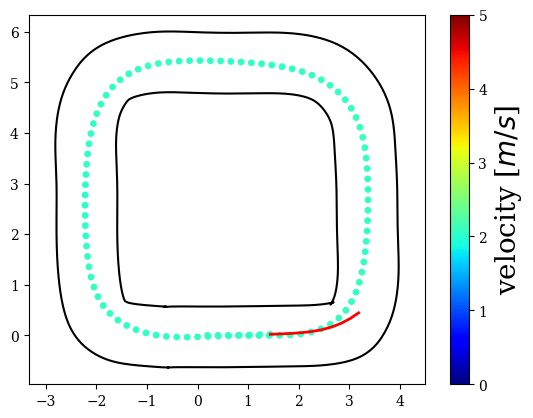

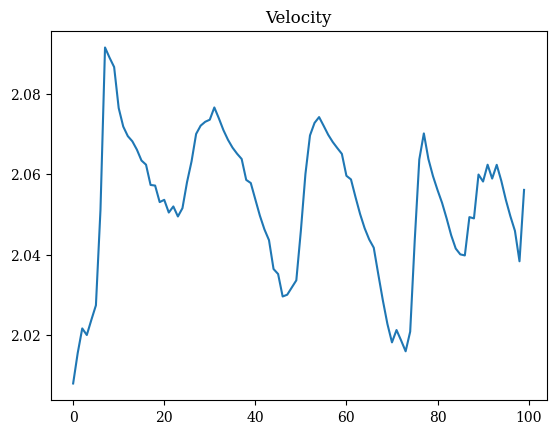

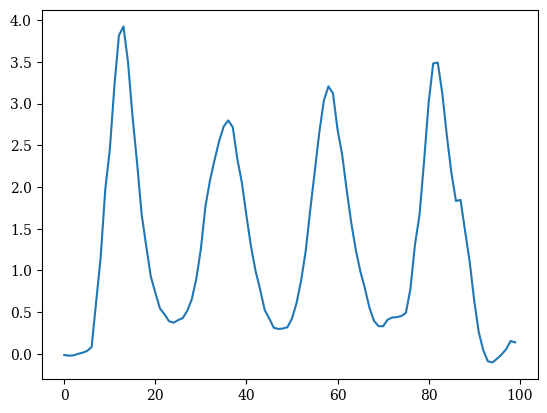

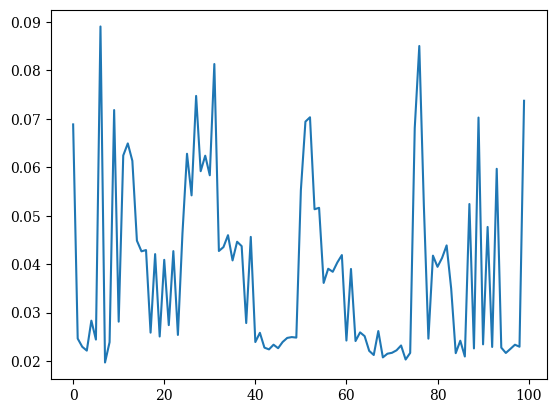

In [12]:
x_cur = np.array([0., 0., 2., 0., 0.])  # Initial state.

# Load ILQR
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)

config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR() #(config_file)
solver.update_path(path)

obs1 = np.array([[-1, -1, -0.5, -0.5], [5.3, 5.8, 5.8, 5.3]]).T
obs2 = np.array([[1, 1.25, 1.5, 1.5, 1.25, 1], [5.8, 5.4, 5.8 , 6.0, 6.2, 6.0]]).T
obs3 = np.array([[2.5, 2.5, 2, 2], [-0, 0.5, 0.5, -0]]).T
# obs4 = np.array([[-200, -200, -1.5, -1.5], [0.5, 1, 1, 0.5]]).T
obs_list = [[obs1 for _ in range(10)], 
            # [obs2 for _ in range(10)],
            [obs3 for _ in range(10)]]
            # [obs4 for _ in range(10)]]
# solver.update_obstacles(obs_list)
solver.update_obstacles([])

# define some parameters
n = 10
itr_receding = 100
init_control = np.zeros((2, n))
fig_prog_folder = 'fig/'
! mkdir -p $fig_prog_folder

state_history = np.zeros((5,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    
    plan = solver.plan(x_cur, init_control)
    states = plan['states']
    controls = plan['controls']
    x_cur = states[:,1]
    state_history[:,i]  = x_cur
    init_control[:,:-1] = controls[:,1:]
    pbar.set_description(f"iLQR takes : {plan['t_process']:.2f} sec']")
    t_process[i] = plan['t_process']
    # plot
    plt.clf()
    path.plot_track()
    
    # p = Polygon(obs1, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs2, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs3, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs4, facecolor = 'k')
    # plt.gca().add_patch(p)
    
    sc = plt.scatter(
        state_history[0, :i], state_history[1, :i], s=24,
        c=state_history[2, :i], cmap=cm.jet, vmin=0, vmax=5,
        edgecolor='none', marker='o'
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(r"velocity [$m/s$]", size=20)
    
    plt.plot(states[0, :], states[1, :], 'r', linewidth=2)
    plt.axis('equal')
    plt.savefig(os.path.join(fig_prog_folder, str(i)+".png"), dpi=200)
plt.close('All')

gif_path = os.path.join(fig_prog_folder, 'rollout.gif')
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(itr_receding):
        filename = os.path.join(fig_prog_folder, str(i)+".png")
        image = imageio.imread(filename)
        writer.append_data(image)

plt.figure()
plt.plot(state_history[2,:])
plt.title('Velocity')


plt.figure()
a = state_history[2, :]**2 / 0.257 * np.tan(state_history[-1, :])
plt.plot(a)

plt.figure()
plt.plot(t_process)



In [ ]:
a = np.random.randn(2,20)
b = np.zeros_like(a)

i=7
b[:,:(20-i)] = a[:,i:]
b